# **LATAR BELAKANG**

Persaingan ketat di sektor ritel menuntut perusahaan untuk memahami perilaku konsumen secara lebih mendalam. Supermarket sebagai bisnis berbasis kebutuhan harian menghadapi tantangan dalam mempertahankan loyalitas pelanggan sekaligus meningkatkan nilai pembelian. Informasi seperti usia, penghasilan, serta kebiasaan berbelanja dapat menjadi dasar untuk menyusun strategi pemasaran yang lebih efektif dan terarah.

Dengan mengidentifikasi pola konsumsi serta preferensi pelanggan, perusahaan dapat melakukan segmentasi pasar, menyusun program promosi yang personal, dan mengambil keputusan berbasis data guna mengingkatkan daya saing di pasar.

# **PERNYATAAN MASALAH**

Bagaimana karakteristik demografis dan perilaku belanja pelanggan dapat dikelompokkan ke dalam segmen-segmen yang relevan untuk mendukung strategi pemasaran yang lebih tepat sasaran?

## **DATA**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/v/Documents/Purwadhika/Capstone Project/Module 2/Supermarket Customers.csv",
                 sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## **DATA UNDERSTANDING AND CLEANING**

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()


Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
pd.set_option('display.max_colwidth',None)
# data uni di tiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].unique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                          data = listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,ID,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]","[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]","[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,"[Graduation, PhD, Master, Basic, 2n Cycle]","[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]","[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]","[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 

## **MISSING VALUE**

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

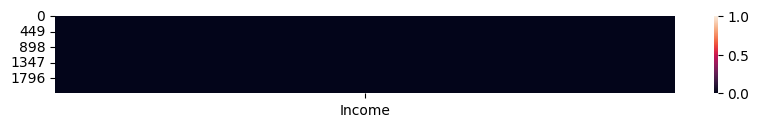

In [7]:
# sebaran missing value di dalam data
plt.figure(figsize=(10,1))
sns.heatmap(df[['Income']].isna())

In [8]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [9]:
# proporsi missing value 'Income'
proporsi = (df['Income'].isna().sum())/len(df)*100
print(f'Proporsi Missing Value "Income" sebesar {proporsi}')

Proporsi Missing Value "Income" sebesar 1.0714285714285714


In [10]:
# mengisi data kosong dengan median; karena datanya tidak terdistribusi normal 
df['Income'].fillna(df['Income'].median(), inplace=True)

In [11]:
# jumlah data kosong setelah pengisian
df[['Income']].isna().sum()

Income    0
dtype: int64

In [12]:
#mengubah date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%d/%m/%Y')
df['Dt_Customer']

0       04/09/2012
1       08/03/2014
2       21/08/2013
3       10/02/2014
4       19/01/2014
           ...    
2235    13/06/2013
2236    10/06/2014
2237    25/01/2014
2238    24/01/2014
2239    15/10/2012
Name: Dt_Customer, Length: 2240, dtype: object

# **DATA YANG SUDAH BERSIH**

In [13]:
listItem = []
for col in df.columns:
    unique_vals = df[col].drop_duplicates()
    n_sample = min(2, len(unique_vals))
    sample_vals = list(unique_vals.sample(n_sample, random_state=42).values)

    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        sample_vals
    ])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,"[2607, 7247]"
1,Year_Birth,int64,0,59,"[1957, 1967]"
2,Education,object,0,5,"[PhD, 2n Cycle]"
3,Marital_Status,object,0,8,"[Together, Alone]"
4,Income,float64,0,1975,"[53154.0, 63211.0]"
5,Kidhome,int64,0,3,"[0, 1]"
6,Teenhome,int64,0,3,"[0, 1]"
7,Dt_Customer,object,0,663,"[23/04/2013, 02/12/2012]"
8,Recency,int64,0,100,"[78, 87]"
9,MntWines,int64,0,776,"[623, 581]"


# **ANALISIS DATA**

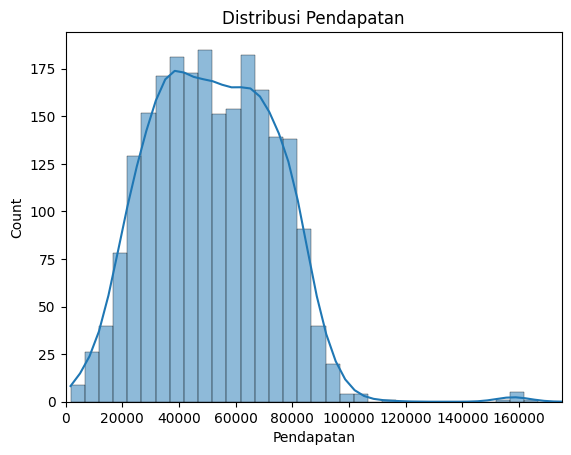

In [14]:
# Visualisasi distribusi pendapatan
sns.histplot(df['Income'].dropna(), kde=True)
plt.xlim(0,175e3)
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.show()

Insight:
Strategi pemasaran premium atau produk dengan harga tinggi bisa ditargetkan ke segmen pelanggan dengan pendapatan tinggi, namun tetap perlu pendekatan berbeda untuk segmen menengah.

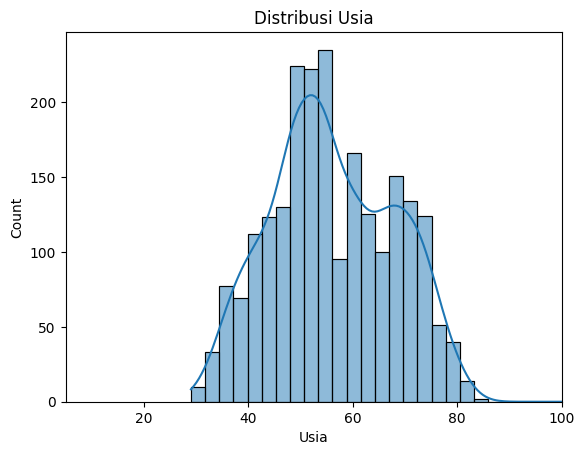

In [15]:
# Visualisasi distribusi usia (dihitung dari tahun lahir)
df['Age'] = 2025 - df['Year_Birth']
sns.histplot(df['Age'], kde=True)
plt.xlim(5,100)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.show()

Insight:

Mayoritas pelanggan adalah orang dewasa paruh baya (puncaknya di usia sekitar 40-50 tahun). Strategi pemasaran dan penawaran produk bisa disesuaikan untuk kebutuhan keluarga, stabilitas finansial, atau gaya hidup mapan.

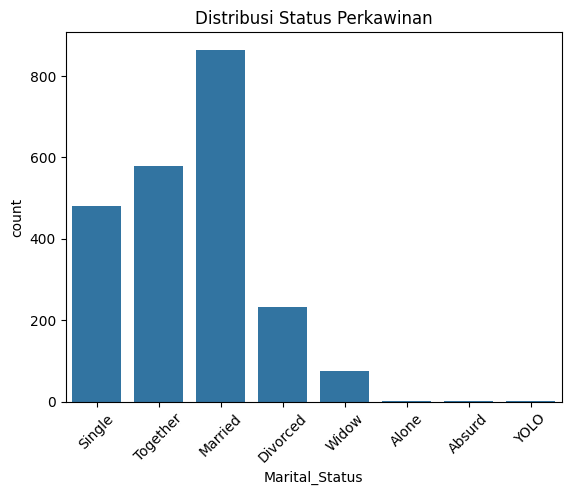

In [16]:
# Visualisasi status perkawinan
sns.countplot(x='Marital_Status', data=df)
plt.title('Distribusi Status Perkawinan')
plt.xticks(rotation=45)
plt.show()

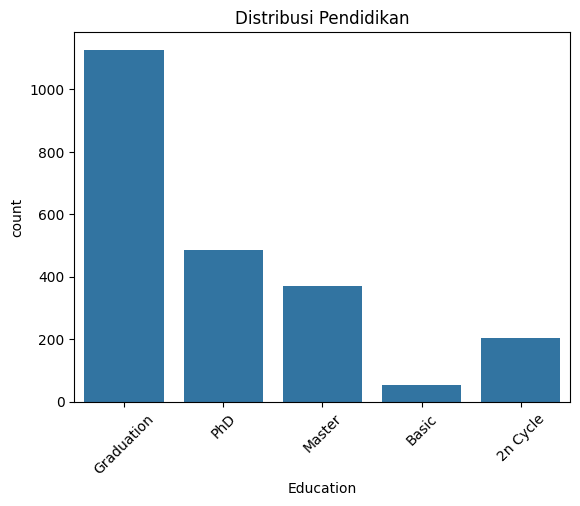

In [17]:
# Visualisasi pendidikan
sns.countplot(x='Education', data=df)
plt.title('Distribusi Pendidikan')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 3 Top Products

In [37]:
# 10 Customer dengan Belanja Terbanyak

top_10 = df['ID'].count_values()
plt.figure(figsize=(10,6))
plt.bar(top_10.index.astype(str), top_10.values)
plt.title("Top 10 Customer IDs by Frequency")
plt.xlabel("Customer ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




# Tambahkan kolom total belanja
df["Total_Spent"] = df[
    ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
].sum(axis=1)

# Ambil 10 customer dengan total belanja tertinggi
top_spenders = df[["ID", "Total_Spent"]].sort_values(by="Total_Spent", ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10,6))
plt.bar(top_spenders["ID"].astype(str), top_spenders["Total_Spent"])
plt.title("Top 10 Customer IDs by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



AttributeError: 'Series' object has no attribute 'count_values'

In [21]:
# 3 Top Campaign

In [22]:
# 2 Top Place to Sell